In [35]:
import math

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set_context("paper", font_scale=1.4)
sns.set_style("ticks")
plt.style.use("seaborn-ticks")

#### Lennard-Jones units to SI units?

In [91]:
# Scaling for LJU -> SI

sigma = 3.4 * 10**(-10)  # nm
epsilon = 1.65 * 10**(-21) # J
m = 6.69 * 10**(-26)  # mass of argon, kg
k_B = 1.380649 * 10 ** (-23)  # J/K

t = sigma * np.sqrt(m / epsilon)
T = epsilon/k_B # = about 120...

print("Sigma :", sigma)
print("Epsilon :", epsilon)
print("Mass :", m)
print("Time :", t)
print("Temperature :", T)

Sigma : 3.4e-10
Epsilon : 1.6499999999999997e-21
Mass : 6.69e-26
Time : 2.164960633696268e-12
Temperature : 119.50901351465865


### Parametri

Phase   | $\rho^\star$| $T^\star$  | $r_c$   | 
--------|------------ | ---------- | ---------|
Solid   | 1.1         | 0.8        | 2.2 |
Liquid  | 0.8         | 1.1        | 2.5 |
Gas     | 0.05        | 1.2        | 5.0 |

### Lennard-Jones Units


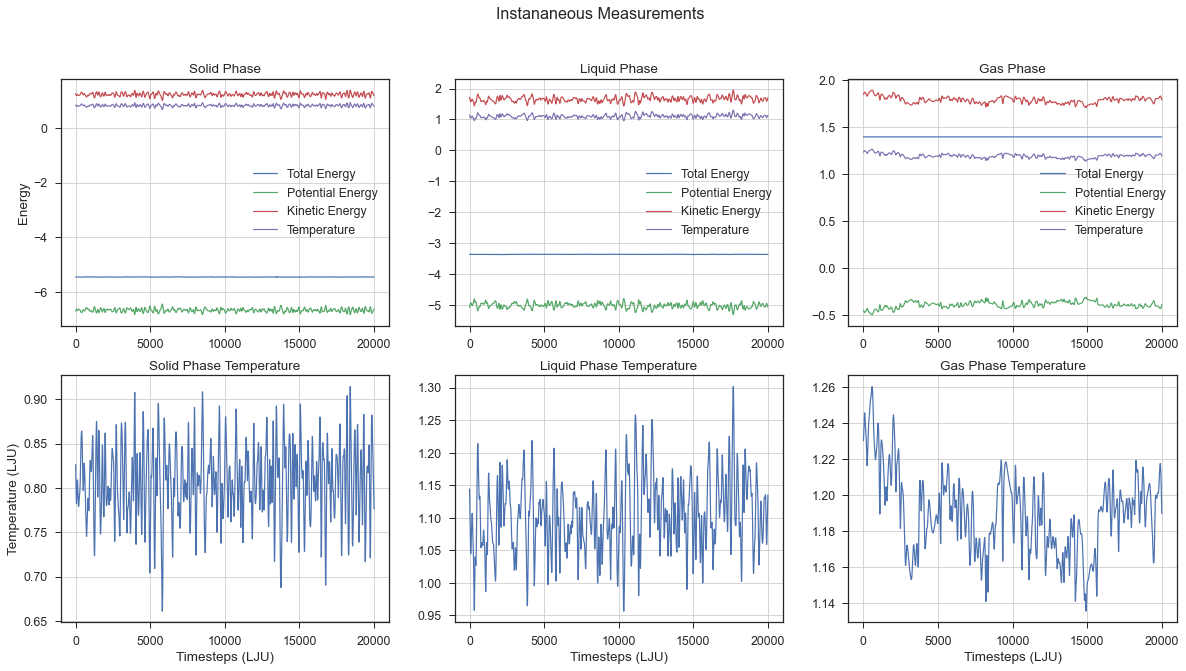

In [70]:
cutoff = 20000
N = cutoff
x = np.arange(N)  # * t

fig, ax = plt.subplots(2, 3, figsize=(20, 10))

plt.suptitle("Instananeous Measurements")

# SOLID PHASE

inst_E = np.loadtxt("./data/solid/output_etot.dat", max_rows=cutoff)
inst_PE = np.loadtxt("./data/solid/output_epot.dat", max_rows=cutoff)
inst_KE = np.loadtxt("./data/solid/output_ekin.dat", max_rows=cutoff)
inst_T = np.loadtxt("./data/solid/output_temp.dat", max_rows=cutoff)

sns.lineplot(x=x, y=inst_E, label="Total Energy", ax=ax[0, 0])
sns.lineplot(x=x, y=inst_PE, label="Potential Energy", ax=ax[0, 0])
sns.lineplot(x=x, y=inst_KE, label="Kinetic Energy", ax=ax[0, 0])
sns.lineplot(x=x, y=inst_T, label="Temperature", ax=ax[0, 0])
ax[0, 0].set(title="Solid Phase", ylabel="Energy")
ax[0, 0].grid()
ax[0, 0].legend()

sns.lineplot(x=x, y=inst_T, ax=ax[1, 0])
ax[1, 0].set(
    title="Solid Phase Temperature",
    xlabel="Timesteps (LJU)",
    ylabel="Temperature (LJU)",
)
ax[1, 0].grid()

# LIQUID PHASE

inst_E = np.loadtxt("./data/liquid/output_etot.dat", max_rows=cutoff)
inst_PE = np.loadtxt("./data/liquid/output_epot.dat", max_rows=cutoff)
inst_KE = np.loadtxt("./data/liquid/output_ekin.dat", max_rows=cutoff)
inst_T = np.loadtxt("./data/liquid/output_temp.dat", max_rows=cutoff)

sns.lineplot(x=x, y=inst_E, label="Total Energy", ax=ax[0, 1])
sns.lineplot(x=x, y=inst_PE, label="Potential Energy", ax=ax[0, 1])
sns.lineplot(x=x, y=inst_KE, label="Kinetic Energy", ax=ax[0, 1])
sns.lineplot(x=x, y=inst_T, label="Temperature", ax=ax[0, 1])

ax[0, 1].set(title="Liquid Phase")
ax[0, 1].grid()
ax[0, 1].legend()

sns.lineplot(x=x, y=inst_T, ax=ax[1, 1])
ax[1, 1].set(title="Liquid Phase Temperature", xlabel="Timesteps (LJU)")
ax[1, 1].grid()

# GAS PHASE

inst_E = np.loadtxt("./data/gas/output_etot.dat", max_rows=cutoff)
inst_PE = np.loadtxt("./data/gas/output_epot.dat", max_rows=cutoff)
inst_KE = np.loadtxt("./data/gas/output_ekin.dat", max_rows=cutoff)
inst_T = np.loadtxt("./data/gas/output_temp.dat", max_rows=cutoff)

sns.lineplot(x=x, y=inst_E, label="Total Energy", ax=ax[0, 2])
sns.lineplot(x=x, y=inst_PE, label="Potential Energy", ax=ax[0, 2])
sns.lineplot(x=x, y=inst_KE, label="Kinetic Energy", ax=ax[0, 2])
sns.lineplot(x=x, y=inst_T, label="Temperature", ax=ax[0, 2])

ax[0, 2].set(title="Gas Phase")
ax[0, 2].grid()
ax[0, 2].legend()

sns.lineplot(x=x, y=inst_T, ax=ax[1, 2])
ax[1, 2].set(title="Gas Phase Temperature", xlabel="Timesteps (LJU)")
ax[1, 2].grid()

plt.show()

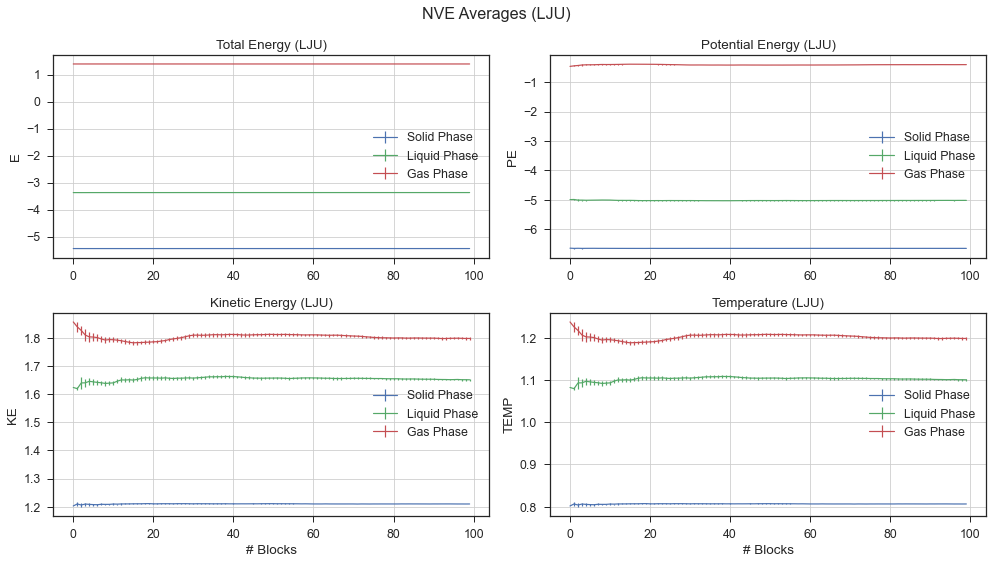

In [63]:
# Blocked Averages
fig, ax = plt.subplots(2, 2, figsize=(14, 8))
fig.suptitle("NVE Averages (LJU)")

N = 100  # Blocks
x = np.arange(N)

# SOLID PHASE

datafile = "./data/solid/output.ave_etot.dat"
avg, err = np.loadtxt(datafile, usecols=(1, 2), delimiter=" ", unpack="true")
ax[0, 0].errorbar(x, avg, yerr=err, label="Solid Phase")

datafile = "./data/solid/output.ave_epot.dat"
avg, err = np.loadtxt(datafile, usecols=(1, 2), delimiter=" ", unpack="true")
ax[0, 1].errorbar(x, avg, yerr=err, label="Solid Phase")

datafile = "./data/solid/output.ave_ekin.dat"
avg, err = np.loadtxt(datafile, usecols=(1, 2), delimiter=" ", unpack="true")
ax[1, 0].errorbar(x, avg, yerr=err, label="Solid Phase")

datafile = "./data/solid/output.ave_temp.dat"
avg, err = np.loadtxt(datafile, usecols=(1, 2), delimiter=" ", unpack="true")
ax[1, 1].errorbar(x, avg, yerr=err, label="Solid Phase")

# LIQUID PHASE

datafile = "./data/liquid/output.ave_etot.dat"
avg, err = np.loadtxt(datafile, usecols=(1, 2), delimiter=" ", unpack="true")
ax[0, 0].errorbar(x, avg, yerr=err, label="Liquid Phase")

datafile = "./data/liquid/output.ave_epot.dat"
avg, err = np.loadtxt(datafile, usecols=(1, 2), delimiter=" ", unpack="true")
ax[0, 1].errorbar(x, avg, yerr=err, label="Liquid Phase")

datafile = "./data/liquid/output.ave_ekin.dat"
avg, err = np.loadtxt(datafile, usecols=(1, 2), delimiter=" ", unpack="true")
ax[1, 0].errorbar(x, avg, yerr=err, label="Liquid Phase")

datafile = "./data/liquid/output.ave_temp.dat"
avg, err = np.loadtxt(datafile, usecols=(1, 2), delimiter=" ", unpack="true")
ax[1, 1].errorbar(x, avg, yerr=err, label="Liquid Phase")

# GAS PHASE

datafile = "./data/gas/output.ave_etot.dat"
avg, err = np.loadtxt(datafile, usecols=(1, 2), delimiter=" ", unpack="true")
ax[0, 0].errorbar(x, avg, yerr=err, label="Gas Phase")

datafile = "./data/gas/output.ave_epot.dat"
avg, err = np.loadtxt(datafile, usecols=(1, 2), delimiter=" ", unpack="true")
ax[0, 1].errorbar(x, avg, yerr=err, label="Gas Phase")

datafile = "./data/gas/output.ave_ekin.dat"
avg, err = np.loadtxt(datafile, usecols=(1, 2), delimiter=" ", unpack="true")
ax[1, 0].errorbar(x, avg, yerr=err, label="Gas Phase")

datafile = "./data/gas/output.ave_temp.dat"
avg, err = np.loadtxt(datafile, usecols=(1, 2), delimiter=" ", unpack="true")
ax[1, 1].errorbar(x, avg, yerr=err, label="Gas Phase")

# Formatting

ax[0, 0].title.set_text("Total Energy (LJU)")
ax[0, 0].set_ylabel("E")
ax[0, 0].grid()
ax[0, 0].legend()

ax[0, 1].title.set_text("Potential Energy (LJU)")
ax[0, 1].set_ylabel("PE")
ax[0, 1].grid()
ax[0, 1].legend()

ax[1, 0].title.set_text("Kinetic Energy (LJU)")
ax[1, 0].grid()
ax[1, 0].legend()
ax[1, 0].set_ylabel("KE")
ax[1, 0].set_xlabel("# Blocks")

ax[1, 1].title.set_text("Temperature (LJU)")
ax[1, 1].grid()
ax[1, 1].legend()
ax[1, 1].set_ylabel("TEMP")
ax[1, 1].set_xlabel("# Blocks")

plt.tight_layout()
plt.show()

### SI Units

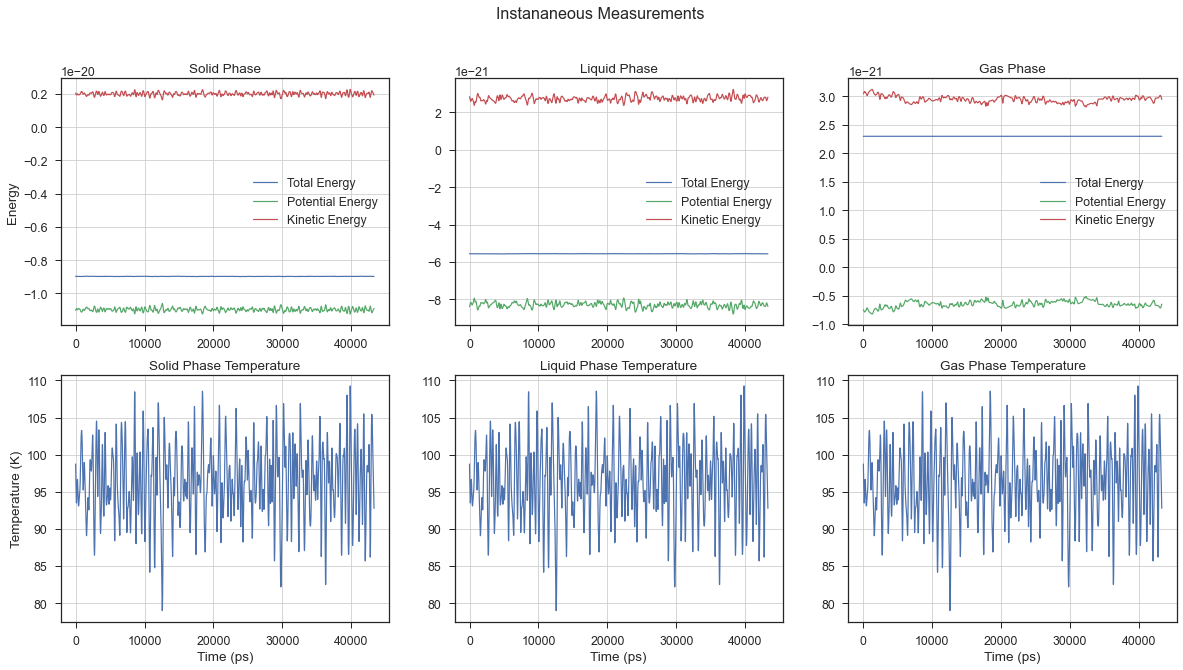

In [86]:
cutoff = 20000

N = cutoff
x = np.arange(N) * t * 10**12 # picoseconds

fig, ax = plt.subplots(2, 3, figsize=(20, 10))

plt.suptitle("Instananeous Measurements")

# SOLID PHASE

inst_E = np.loadtxt("./data/solid/output_etot.dat", max_rows=cutoff)
inst_PE = np.loadtxt("./data/solid/output_epot.dat", max_rows=cutoff)
inst_KE = np.loadtxt("./data/solid/output_ekin.dat", max_rows=cutoff)
inst_T = np.loadtxt("./data/solid/output_temp.dat", max_rows=cutoff)

sns.lineplot(x=x, y=inst_E * epsilon, label="Total Energy", ax=ax[0, 0])
sns.lineplot(x=x, y=inst_PE * epsilon, label="Potential Energy", ax=ax[0, 0])
sns.lineplot(x=x, y=inst_KE * epsilon, label="Kinetic Energy", ax=ax[0, 0])
ax[0, 0].set(title="Solid Phase", ylabel="Energy")
ax[0, 0].grid()
ax[0, 0].legend()

sns.lineplot(x=x, y=inst_T * T, ax=ax[1, 0])
ax[1, 0].set(
    title="Solid Phase Temperature", xlabel="Time (ps)", ylabel="Temperature (K)"
)
ax[1, 0].grid()

# LIQUID PHASE

inst_E = np.loadtxt("./data/liquid/output_etot.dat", max_rows=cutoff)
inst_PE = np.loadtxt("./data/liquid/output_epot.dat", max_rows=cutoff)
inst_KE = np.loadtxt("./data/liquid/output_ekin.dat", max_rows=cutoff)

sns.lineplot(x=x, y=inst_E * epsilon, label="Total Energy", ax=ax[0, 1])
sns.lineplot(x=x, y=inst_PE * epsilon, label="Potential Energy", ax=ax[0, 1])
sns.lineplot(x=x, y=inst_KE * epsilon, label="Kinetic Energy", ax=ax[0, 1])

ax[0, 1].set(title="Liquid Phase")
ax[0, 1].grid()
ax[0, 1].legend()

sns.lineplot(x=x, y=inst_T * T, ax=ax[1, 1])
ax[1, 1].set(title="Liquid Phase Temperature", xlabel="Time (ps)")
ax[1, 1].grid()

# GAS PHASE

inst_E = np.loadtxt("./data/gas/output_etot.dat", max_rows=cutoff)
inst_PE = np.loadtxt("./data/gas/output_epot.dat", max_rows=cutoff)
inst_KE = np.loadtxt("./data/gas/output_ekin.dat", max_rows=cutoff)

sns.lineplot(x=x, y=inst_E * epsilon, label="Total Energy", ax=ax[0, 2])
sns.lineplot(x=x, y=inst_PE * epsilon, label="Potential Energy", ax=ax[0, 2])
sns.lineplot(x=x, y=inst_KE * epsilon, label="Kinetic Energy", ax=ax[0, 2])

ax[0, 2].set(title="Gas Phase")
ax[0, 2].grid()
ax[0, 2].legend()

sns.lineplot(x=x, y=inst_T * T, ax=ax[1, 2])
ax[1, 2].set(title="Gas Phase Temperature", xlabel="Time (ps)")
ax[1, 2].grid()

plt.show()

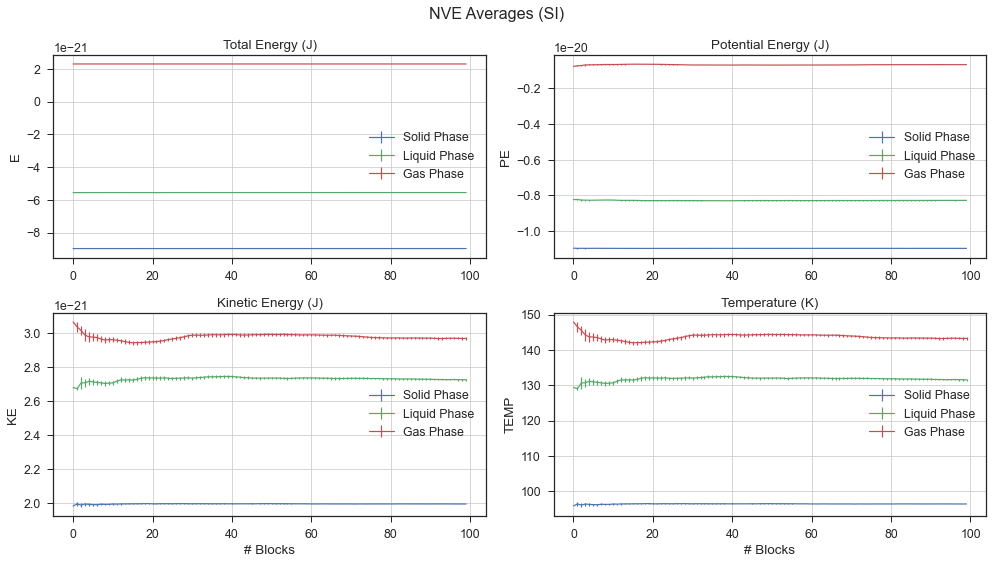

In [83]:
# Blocked Averages
fig, ax = plt.subplots(2, 2, figsize=(14, 8))
fig.suptitle("NVE Averages (SI)")

N = 100  # Blocks
x = np.arange(N)

# SOLID PHASE

datafile = "./data/solid/output.ave_etot.dat"
avg, err = np.loadtxt(datafile, usecols=(1, 2), delimiter=" ", unpack="true")
ax[0, 0].errorbar(x, avg * epsilon, yerr=err * epsilon, label="Solid Phase")

datafile = "./data/solid/output.ave_epot.dat"
avg, err = np.loadtxt(datafile, usecols=(1, 2), delimiter=" ", unpack="true")
ax[0, 1].errorbar(x, avg * epsilon, yerr=err * epsilon, label="Solid Phase")

datafile = "./data/solid/output.ave_ekin.dat"
avg, err = np.loadtxt(datafile, usecols=(1, 2), delimiter=" ", unpack="true")
ax[1, 0].errorbar(x, avg * epsilon, yerr=err * epsilon, label="Solid Phase")

datafile = "./data/solid/output.ave_temp.dat"
avg, err = np.loadtxt(datafile, usecols=(1, 2), delimiter=" ", unpack="true")
ax[1, 1].errorbar(
    x, avg * T, yerr=err * T, label="Solid Phase"
)

# LIQUID PHASE

datafile = "./data/liquid/output.ave_etot.dat"
avg, err = np.loadtxt(datafile, usecols=(1, 2), delimiter=" ", unpack="true")
ax[0, 0].errorbar(x, avg * epsilon, yerr=err * epsilon, label="Liquid Phase")

datafile = "./data/liquid/output.ave_epot.dat"
avg, err = np.loadtxt(datafile, usecols=(1, 2), delimiter=" ", unpack="true")
ax[0, 1].errorbar(x, avg * epsilon, yerr=err * epsilon, label="Liquid Phase")

datafile = "./data/liquid/output.ave_ekin.dat"
avg, err = np.loadtxt(datafile, usecols=(1, 2), delimiter=" ", unpack="true")
ax[1, 0].errorbar(x, avg * epsilon, yerr=err * epsilon, label="Liquid Phase")

datafile = "./data/liquid/output.ave_temp.dat"
avg, err = np.loadtxt(datafile, usecols=(1, 2), delimiter=" ", unpack="true")
ax[1, 1].errorbar(
    x, avg * T, yerr=err * T, label="Liquid Phase"
)

# GAS PHASE

datafile = "./data/gas/output.ave_etot.dat"
avg, err = np.loadtxt(datafile, usecols=(1, 2), delimiter=" ", unpack="true")
ax[0, 0].errorbar(x, avg * epsilon, yerr=err * epsilon, label="Gas Phase")

datafile = "./data/gas/output.ave_epot.dat"
avg, err = np.loadtxt(datafile, usecols=(1, 2), delimiter=" ", unpack="true")
ax[0, 1].errorbar(x, avg * epsilon, yerr=err * epsilon, label="Gas Phase")

datafile = "./data/gas/output.ave_ekin.dat"
avg, err = np.loadtxt(datafile, usecols=(1, 2), delimiter=" ", unpack="true")
ax[1, 0].errorbar(x, avg * epsilon, yerr=err * epsilon, label="Gas Phase")

datafile = "./data/gas/output.ave_temp.dat"
avg, err = np.loadtxt(datafile, usecols=(1, 2), delimiter=" ", unpack="true")
ax[1, 1].errorbar(
    x, avg * T, yerr=err * T, label="Gas Phase"
)

# Formatting

ax[0, 0].title.set_text("Total Energy (J)")
ax[0, 0].set_ylabel("E")
ax[0, 0].grid()
ax[0, 0].legend()

ax[0, 1].title.set_text("Potential Energy (J)")
ax[0, 1].set_ylabel("PE")
ax[0, 1].grid()
ax[0, 1].legend()

ax[1, 0].title.set_text("Kinetic Energy (J)")
ax[1, 0].grid()
ax[1, 0].legend()
ax[1, 0].set_ylabel("KE")
ax[1, 0].set_xlabel("# Blocks")

ax[1, 1].title.set_text("Temperature (K)")
ax[1, 1].grid()
ax[1, 1].legend()
ax[1, 1].set_ylabel("TEMP")
ax[1, 1].set_xlabel("# Blocks")

plt.tight_layout()
plt.show()